<a href="https://colab.research.google.com/github/Marcelosgf/InteliCompAV2_2025_1/blob/main/AV2_IC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
df=pd.read_csv('Salary_Data.csv')

Removendo linhas com todos valores ausentes

In [78]:
df = df.dropna(how='all')

Preenchendo Colunas númericas com mediana

In [79]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Years of Experience'].fillna(df['Years of Experience'].median(), inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)

<ipython-input-79-46f173763b5e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-79-46f173763b5e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Preenchendo colunas categóricas com a moda

In [80]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Education Level'].fillna(df['Education Level'].mode()[0], inplace=True)
df['Job Title'].fillna(df['Job Title'].mode()[0], inplace=True)

<ipython-input-80-89371e2af26b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
<ipython-input-80-89371e2af26b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

Verificando se faltou algum valor ausente ser tratado

In [81]:
print(df.isnull().sum())

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


Selecionando Colunas e codificando os dados categóricos

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

education_map = {
    "phD": "PhD",
    "PhD": "PhD",
    "Master's": "Master's",
    "Master's Degree": "Master's",
    "Bachelor's": "Bachelor's",
    "Bachelor's Degree": "Bachelor's",
    "High School": "High School"
}


df['Education Level'] = df['Education Level'].replace(education_map)

# 1. Selecionar features e target
X = df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y = df['Salary']

Codificando One Hot Enconder

In [89]:
categorical_features = ['Gender', 'Education Level', 'Job Title']
numeric_features = ['Age', 'Years of Experience']

In [90]:
# Criação do pré-processador que aplica OneHot nos categoricos e deixa os numéricos como estão
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # mantém as colunas numéricas
)

In [127]:
X_transformed = preprocessor.fit_transform(X)

# Para ver como fica:
X_transformed_df = pd.DataFrame(X_transformed.toarray() if hasattr(X_transformed, "toarray") else X_transformed)

print(X_transformed_df.head())

   0    1    2    3    4    5    6    7    8    9    ...  192  193  194  195  \
0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   196  197  198  199   200   201  
0  0.0  0.0  0.0  0.0  32.0   5.0  
1  0.0  0.0  0.0  0.0  28.0   3.0  
2  0.0  0.0  0.0  0.0  45.0  15.0  
3  0.0  0.0  0.0  0.0  36.0   7.0  
4  0.0  0.0  0.0  0.0  52.0  20.0  

[5 rows x 202 columns]


In [92]:
# Para pegar os nomes das novas colunas criadas:
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combinar com colunas numéricas
all_feature_names = list(encoded_feature_names) + numeric_features

# Criar DataFrame completo com nomes
X_transformed_df = pd.DataFrame(X_transformed.toarray(), columns=all_feature_names)
X_transformed_df.head()


,Gender_Female,Gender_Male,Gender_Other,Education Level_Bachelor's,Education Level_High School,Education Level_Master's,Education Level_PhD,Job Title_Account Manager,Job Title_Accountant,Job Title_Administrative Assistant,...,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer,Age,Years of Experience
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,5.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,3.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,15.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,7.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,20.0


Criando a pipeline com o modelo de Regressão Linear

In [94]:
# Criar a pipeline: pré-processamento + modelo
linear_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

Dividindo os dados entre treino/teste

In [95]:
# Dividir os dados (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Treinando o Modelo

In [96]:
# Treinar o modelo
linear_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Education Level',
                                                   'Job Title'])])),
                ('regressor', LinearRegression())])

Comparando o desempenho usando métricas apropriadas (ex: RMSE, MAE, R^2)



In [97]:
y_pred = linear_model.predict(X_test)

In [98]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [126]:
print(f"Regressão Linear - MAE: {mae:.2f}")
print(f"Regressão Linear - RMSE: {rmse:.2f}")
print(f"Regressão Linear - R²: {r2:.4f}")

Regressão Linear - MAE: 15495.11
Regressão Linear - RMSE: 21467.89
Regressão Linear - R²: 0.8292


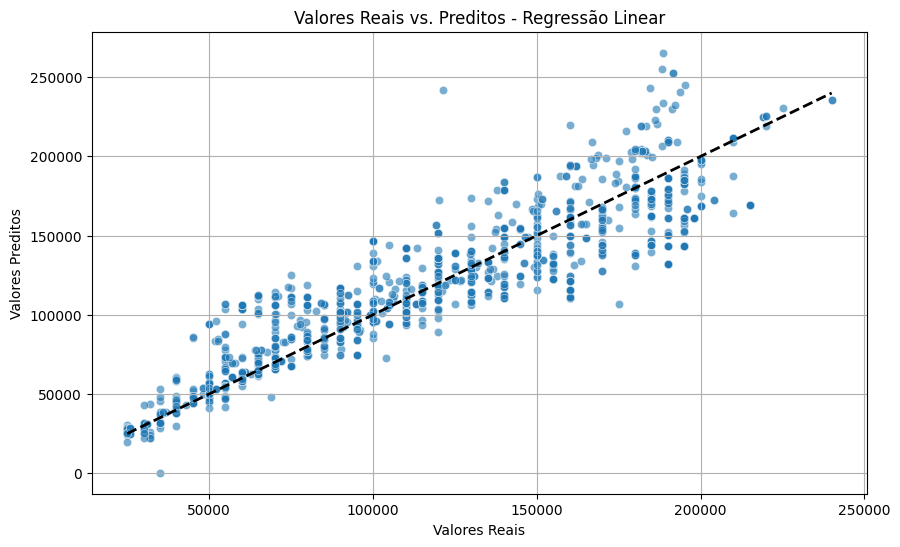

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Linha de referência
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs. Preditos - Regressão Linear')
plt.grid(True)
plt.show()

Random Forest

In [101]:
# Pipeline com pré-processamento + Random Forest
rf_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [102]:
#Treinando o modelo nos dados de treino
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Education Level',
                                                   'Job Title'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [103]:
# Fazendo predições no conjunto teste
y_pred_rf = rf_model.predict(X_test)

Comparando o desempenho usando métricas apropriadas (ex: RMSE, MAE, R^2)

In [104]:
#Avaliando o Desempenho
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [105]:
print(f"Random Forest - MAE: {mae_rf:.2f}")
print(f"Random Forest - RMSE: {rmse_rf:.2f}")
print(f"Random Forest - R²: {r2_rf:.4f}")

Random Forest - MAE: 3335.33
Random Forest - RMSE: 8246.19
Random Forest - R²: 0.9748


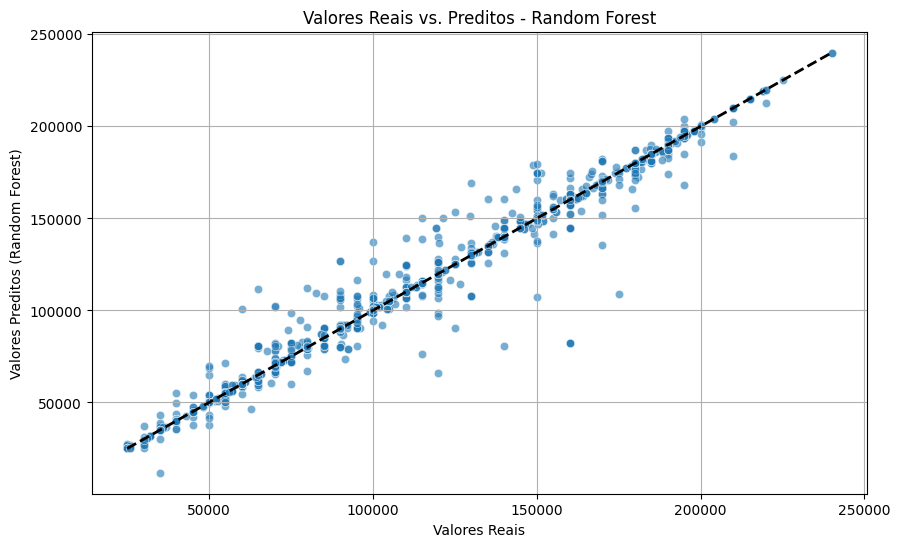

In [106]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos (Random Forest)')
plt.title('Valores Reais vs. Preditos - Random Forest')
plt.grid(True)
plt.show()

Ridge

In [107]:
from sklearn.linear_model import Ridge

ridge_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [108]:
#Avaliando o Desempenho
mae_ri = mean_absolute_error(y_test, y_pred_ridge)
rmse_ri = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ri = r2_score(y_test, y_pred_ridge)

In [109]:
print(f"Ridge - MAE: {mae_ri:.2f}")
print(f"Ridge - RMSE: {rmse_ri:.2f}")
print(f"Ridge - R²: {r2_ri:.4f}")

Ridge - MAE: 15539.66
Ridge - RMSE: 21480.45
Ridge - R²: 0.8290


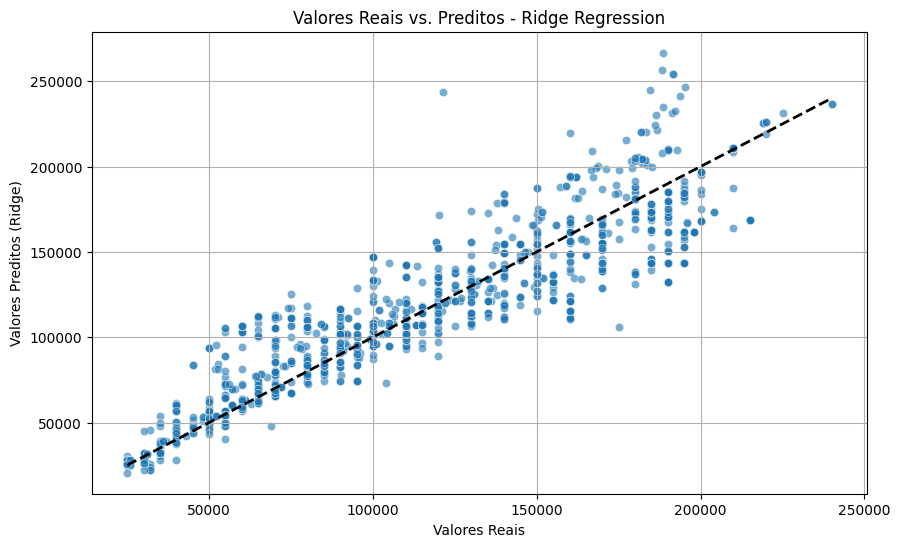

In [110]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos (Ridge)')
plt.title('Valores Reais vs. Preditos - Ridge Regression')
plt.grid(True)
plt.show()

XGBOOST

In [111]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [112]:
#Avaliando o Desempenho
mae_xg = mean_absolute_error(y_test, y_pred_gb)
rmse_xg = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_xg = r2_score(y_test, y_pred_gb)

In [113]:
print(f"XGB - MAE: {mae_xg:.2f}")
print(f"XGB - RMSE: {rmse_xg:.2f}")
print(f"XGB - R²: {r2_xg:.4f}")

XGB - MAE: 11726.97
XGB - RMSE: 15883.04
XGB - R²: 0.9065


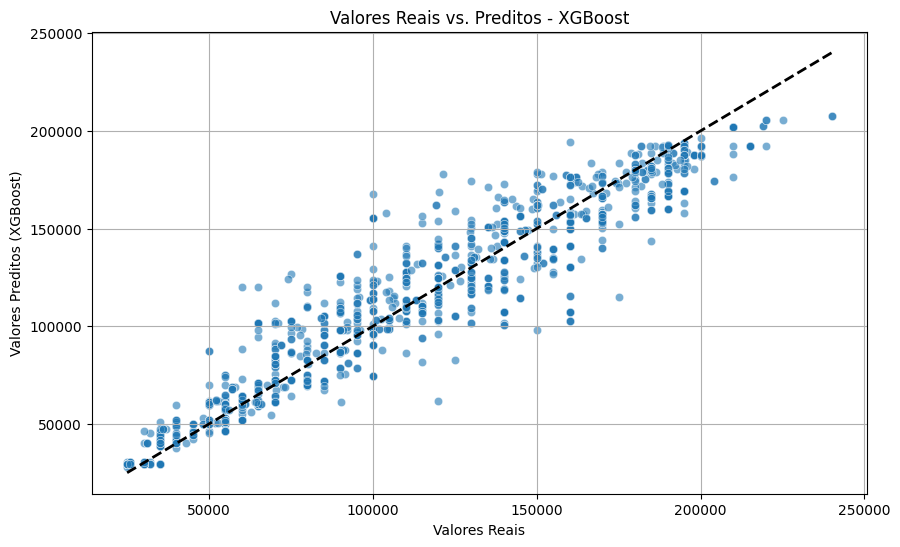

In [114]:
# Gráfico de dispersão
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos (XGBoost)')
plt.title('Valores Reais vs. Preditos - XGBoost')
plt.grid(True)
plt.show()

# Verificando Gráficos de Resultados

<ipython-input-115-9749818ed887>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='MAE', data=results, ax=axes[0], palette='bright')
<ipython-input-115-9749818ed887>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='RMSE', data=results, ax=axes[1],palette='bright')
<ipython-input-115-9749818ed887>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='R2', data=results, ax=axes[2], palette='bright')


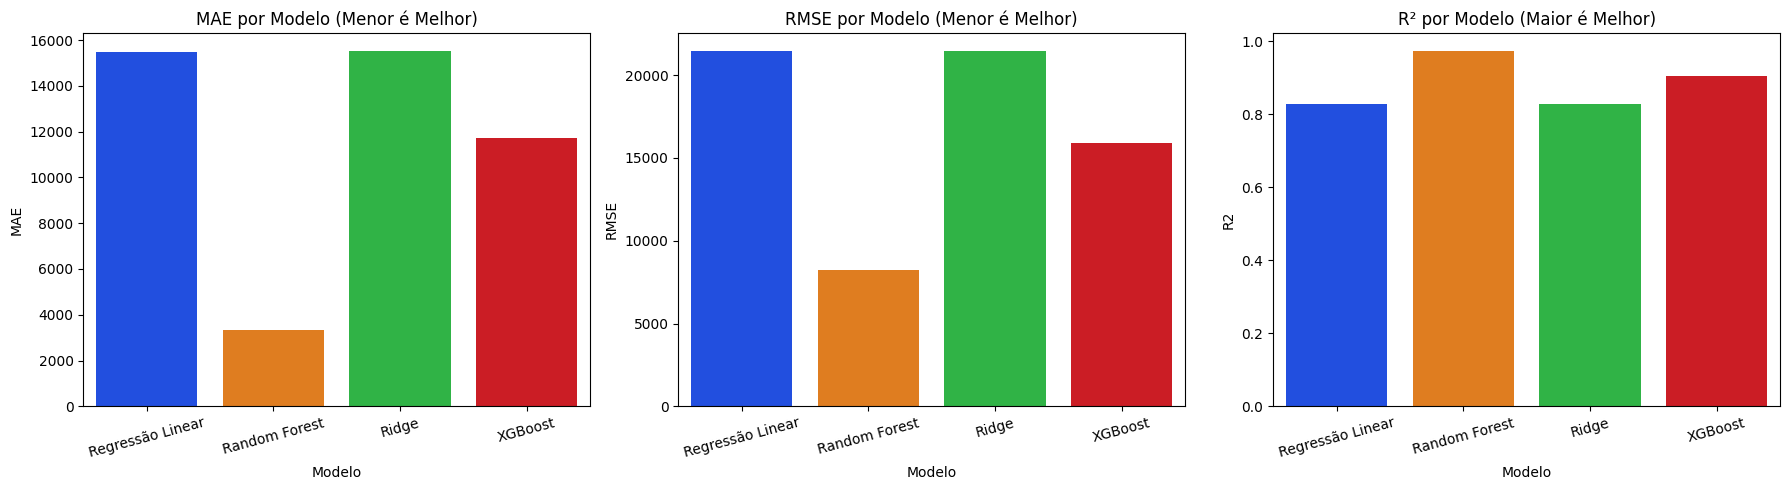

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

results = pd.DataFrame({
    'Modelo': ['Regressão Linear', 'Random Forest', 'Ridge', 'XGBoost'],
    'MAE': [mae, mae_rf, mae_ri, mae_xg],
    'RMSE': [rmse, rmse_rf, rmse_ri, rmse_xg],
    'R2': [r2, r2_rf, r2_ri, r2_xg]})



# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot MAE
sns.barplot(x='Modelo', y='MAE', data=results, ax=axes[0], palette='bright')
axes[0].set_title('MAE por Modelo (Menor é Melhor)')
axes[0].tick_params(axis='x', rotation=15)

# Plot RMSE
sns.barplot(x='Modelo', y='RMSE', data=results, ax=axes[1],palette='bright')
axes[1].set_title('RMSE por Modelo (Menor é Melhor)')
axes[1].tick_params(axis='x', rotation=15)

# Plot R2
sns.barplot(x='Modelo', y='R2', data=results, ax=axes[2], palette='bright')
axes[2].set_title('R² por Modelo (Maior é Melhor)')
axes[2].tick_params(axis='x', rotation=15)

# Adjust layout
plt.tight_layout()
plt.show()


Visualizando a distribuição salarial por genero

In [116]:
# Salário médio por gênero
gender_salary = df.groupby('Gender')['Salary'].agg(['mean', 'median', 'count']).round(2)
print(gender_salary)

             mean    median  count
Gender                            
Female  107891.36  105000.0   3014
Male    121386.39  120000.0   3674
Other   125869.86  158610.0     14


<ipython-input-117-eba79076593a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gender', y='Salary', estimator='mean', errorbar=None, palette='pastel')


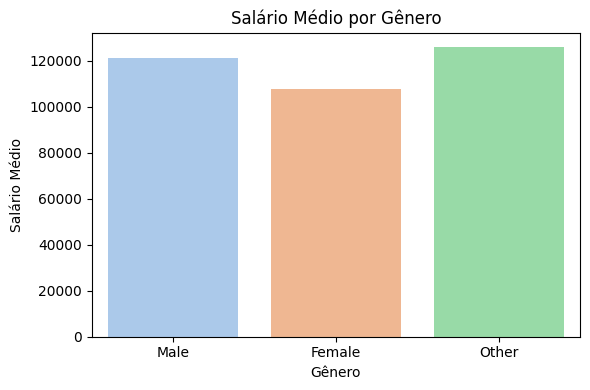

In [117]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Gender', y='Salary', estimator='mean', errorbar=None, palette='pastel')
plt.title('Salário Médio por Gênero')
plt.ylabel('Salário Médio')
plt.xlabel('Gênero')
plt.tight_layout()
plt.show()


In [118]:
job_salary = df.groupby('Job Title')['Salary'].mean().sort_values(ascending=False).head(10).round(2)
print(job_salary)

Job Title
CEO                            250000.00
Chief Technology Officer       250000.00
Chief Data Officer             220000.00
Director of Data Science       204561.40
Director                       200000.00
VP of Finance                  200000.00
Operations Director            190000.00
VP of Operations               190000.00
Director of Human Resources    187500.00
Marketing Director             183984.38
Name: Salary, dtype: float64


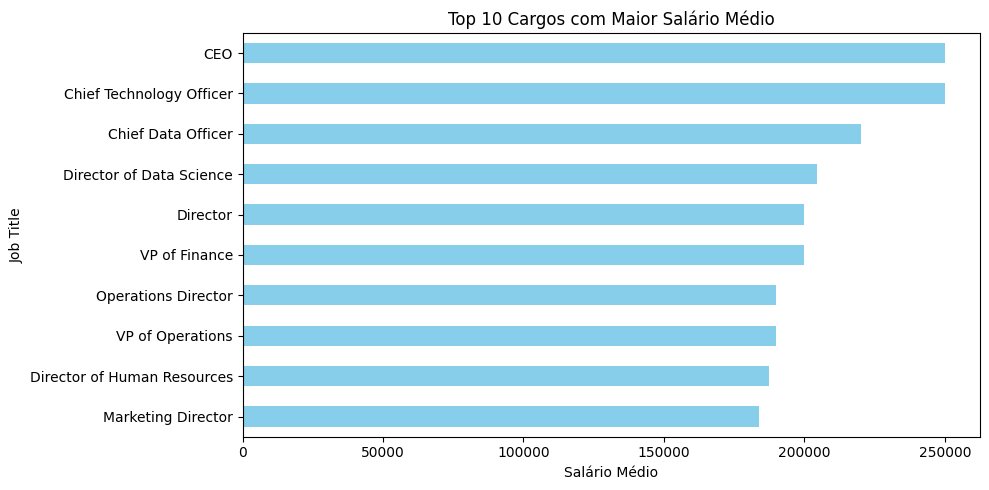

In [119]:
plt.figure(figsize=(10,5))
job_salary.plot(kind='barh', color='skyblue')
plt.title('Top 10 Cargos com Maior Salário Médio')
plt.xlabel('Salário Médio')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

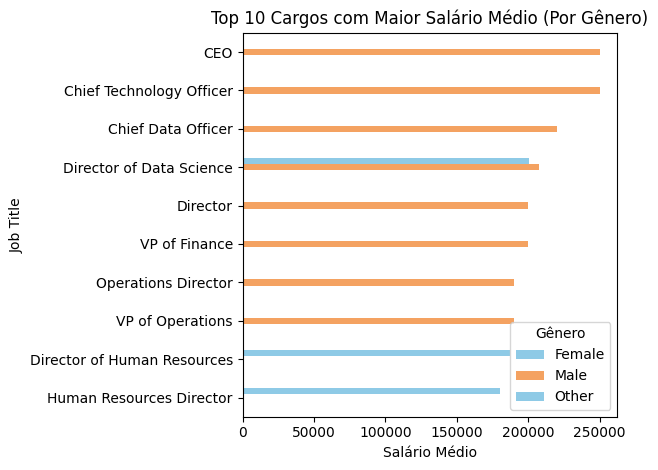

In [120]:
# Group by Job Title and Gender, then compute mean salary
job_gender_salary = df.groupby(['Job Title', 'Gender'])['Salary'].mean().round(2)

# Pivot so we get Gender as columns
pivot_salary = job_gender_salary.unstack()

# Create a new column for average salary (across genders), used for sorting
pivot_salary['Average'] = pivot_salary.mean(axis=1)

# Sort by average and select top 10
top10_jobs = pivot_salary.sort_values(by='Average', ascending=False).head(10)

# Drop 'Average' before plotting
plot_data = top10_jobs.drop(columns='Average')

# Plot
plt.figure(figsize=(10, 6))
plot_data.plot(kind='barh', color=['#8ecae6', '#f4a261'])
plt.title('Top 10 Cargos com Maior Salário Médio (Por Gênero)')
plt.xlabel('Salário Médio')
plt.gca().invert_yaxis()
plt.legend(title='Gênero')
plt.tight_layout()
plt.show()

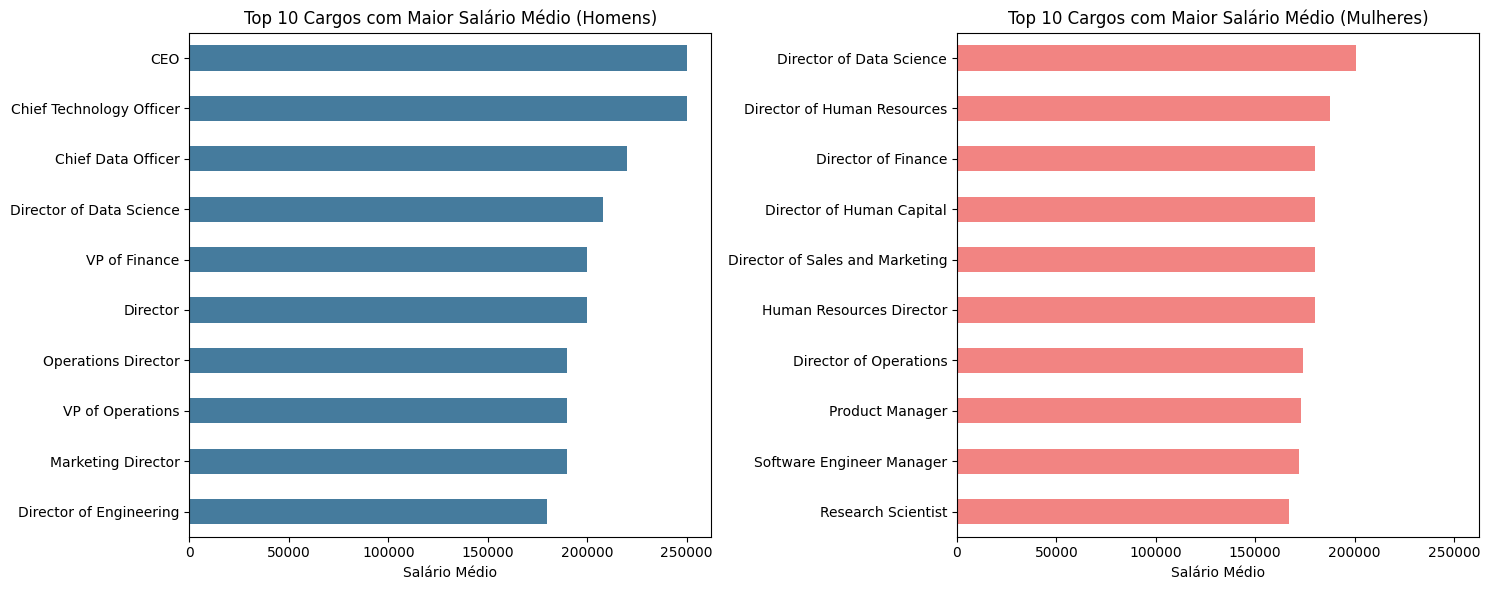

Top 10 Masculino:
 Job Title
CEO                         250000.00
Chief Technology Officer    250000.00
Chief Data Officer          220000.00
Director of Data Science    207741.94
Director                    200000.00
VP of Finance               200000.00
VP of Operations            190000.00
Operations Director         190000.00
Marketing Director          189900.00
Director of Engineering     180000.00
Name: Salary, dtype: float64 

Top 10 Feminino:
 Job Title
Director of Data Science           200769.23
Director of Human Resources        187500.00
Director of Finance                180000.00
Director of Human Capital          180000.00
Director of Sales and Marketing    180000.00
Human Resources Director           180000.00
Director of Operations             174000.00
Product Manager                    172980.77
Software Engineer Manager          171792.90
Research Scientist                 167156.86
Name: Salary, dtype: float64


In [121]:
# Step 1: Group by Job Title and Gender, then calculate mean salary
job_gender_salary = df.groupby(['Job Title', 'Gender'])['Salary'].mean().round(2)

# Step 2: Split by gender
male_salary = job_gender_salary.xs('Male', level='Gender').sort_values(ascending=False).head(10)
female_salary = job_gender_salary.xs('Female', level='Gender').sort_values(ascending=False).head(10)

# Step 3: Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

# Male plot
male_salary.sort_values().plot(kind='barh', color='#457b9d', ax=axes[0])
axes[0].set_title('Top 10 Cargos com Maior Salário Médio (Homens)')
axes[0].set_xlabel('Salário Médio')
axes[0].set_ylabel('')

# Female plot
female_salary.sort_values().plot(kind='barh', color='#f28482', ax=axes[1])
axes[1].set_title('Top 10 Cargos com Maior Salário Médio (Mulheres)')
axes[1].set_xlabel('Salário Médio')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

# Optional: Print the tables
print("Top 10 Masculino:\n", male_salary, '\n')
print("Top 10 Feminino:\n", female_salary)


In [122]:
education_salary = df.groupby('Education Level')['Salary'].mean().sort_values(ascending=False).round(2)
print(education_salary)

Education Level
PhD            165651.46
Master's       130103.94
Bachelor's      95097.71
High School     36706.69
Name: Salary, dtype: float64


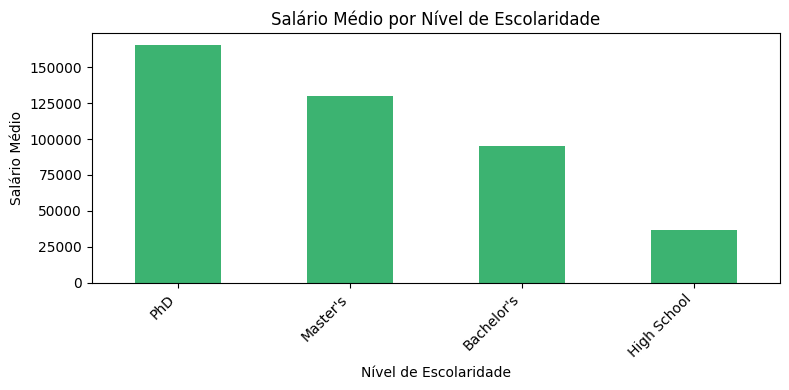

In [123]:
plt.figure(figsize=(8,4))
education_salary.plot(kind='bar', color='mediumseagreen')
plt.title('Salário Médio por Nível de Escolaridade')
plt.ylabel('Salário Médio')
plt.xlabel('Nível de Escolaridade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [124]:
# Agrupar por anos de experiência e calcular salário médio
experience_salary = df.groupby('Years of Experience')['Salary'].mean().round(2)
print(experience_salary.head(10))  # mostrar só os primeiros 10 anos para exemplo

Years of Experience
0.0     29680.23
0.5     35000.00
1.0     46992.85
1.5     36279.17
2.0     58699.46
3.0     72944.41
4.0     83332.09
5.0    103111.09
6.0    111898.23
7.0    122088.15
Name: Salary, dtype: float64


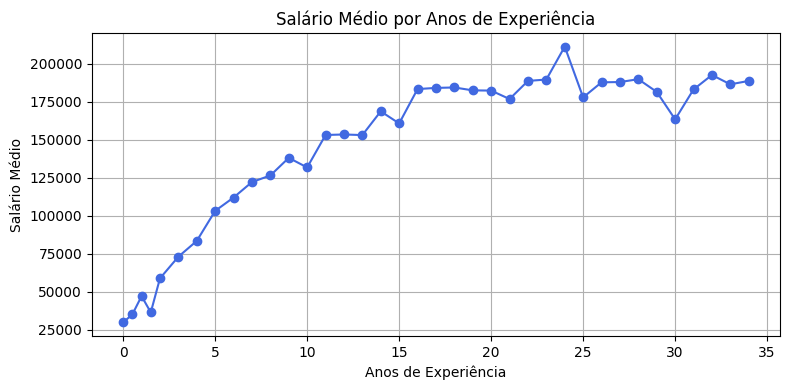

In [125]:
plt.figure(figsize=(8,4))
experience_salary.plot(kind='line', marker='o', color='royalblue')
plt.title('Salário Médio por Anos de Experiência')
plt.ylabel('Salário Médio')
plt.xlabel('Anos de Experiência')
plt.grid(True)
plt.tight_layout()
plt.show()